In [ ]:
#Running the provided code
from google.colab import drive
drive.mount('/content/gdrive')
# Simple CNN model for CIFAR-10
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
#from keras import backend as K
#K.set_image_dim_ordering('th')

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Mounted at /content/gdrive
170498071/170498071 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)              

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


None
Epoch 1/5
1563/1563 [==============================] - 327s 208ms/step - loss: 1.6697 - accuracy: 0.3959 - val_loss: 1.3805 - val_accuracy: 0.5079
Epoch 2/5
1563/1563 [==============================] - 323s 206ms/step - loss: 1.3613 - accuracy: 0.5106 - val_loss: 1.2579 - val_accuracy: 0.5583
Epoch 3/5
1563/1563 [==============================] - 347s 222ms/step - loss: 1.2445 - accuracy: 0.5544 - val_loss: 1.1784 - val_accuracy: 0.5803
Epoch 4/5
1563/1563 [==============================] - 324s 207ms/step - loss: 1.1671 - accuracy: 0.5840 - val_loss: 1.1245 - val_accuracy: 0.5987
Epoch 5/5
1563/1563 [==============================] - 318s 203ms/step - loss: 1.1106 - accuracy: 0.6040 - val_loss: 1.0970 - val_accuracy: 0.6127
Accuracy: 61.27%


In [ ]:
#1. Performing all the required changes
from google.colab import drive
drive.mount('/content/gdrive')
# Simple CNN model for CIFAR-10
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
#from keras import backend as K
#K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# Create the model
model = Sequential()
#Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
#Dropout layer at 20%.
model.add(Dropout(0.2))
#Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
#Max Pool layer with size 2×2.
model.add(MaxPooling2D(pool_size=(2, 2)))
#Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
#• Dropout layer at 20%.
model.add(Dropout(0.2))
#Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
#Max Pool layer with size 2×2.
model.add(MaxPooling2D(pool_size=(2, 2)))
#Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function.
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
#Dropout layer at 20%.
model.add(Dropout(0.2))
#Convolutional layer,128 feature maps with a size of 3×3 and a rectifier activation function.
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
#Max Pool layer with size 2×2.
model.add(MaxPooling2D(pool_size=(2, 2)))
#Flatten layer.
model.add(Flatten())
#Dropout layer at 20%.
model.add(Dropout(0.2))
#Fully connected layer with 1024 units and a rectifier activation function.
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
#Dropout layer at 20%.
model.add(Dropout(0.2))
#Fully connected layer with 512 units and a rectifier activation function
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
#Dropout layer at 20%.
model.add(Dropout(0.2))
#Fully connected output layer with 10 units and a Softmax activation function
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                       

In [ ]:
#2.Predict the first 4 images of the test data
predictions = model.predict(X_test[:4])
# Convert the predictions to class labels
predicted_labels = numpy.argmax(predictions, axis=1)
# Convert the actual labels to class labels
actual_labels = numpy.argmax(y_test[:4], axis=1)

# Print the predicted and actual labels for the first 4 images
print("Predicted labels:", predicted_labels)
print("Actual labels:   ", actual_labels)

1/1 [==============================] - 0s 55ms/step
Predicted labels: [3 8 8 0]
Actual labels:    [3 8 8 0]


Epoch 1/5
1563/1563 [==============================] - 623s 399ms/step - loss: 1.2249 - accuracy: 0.5588 - val_loss: 1.1642 - val_accuracy: 0.5786
Epoch 2/5
1563/1563 [==============================] - 612s 392ms/step - loss: 1.1876 - accuracy: 0.5741 - val_loss: 1.1460 - val_accuracy: 0.5864
Epoch 3/5
1563/1563 [==============================] - 611s 391ms/step - loss: 1.1562 - accuracy: 0.5857 - val_loss: 1.1503 - val_accuracy: 0.5830
Epoch 4/5
1563/1563 [==============================] - 615s 394ms/step - loss: 1.1296 - accuracy: 0.5951 - val_loss: 1.1074 - val_accuracy: 0.6052
Epoch 5/5
1563/1563 [==============================] - 586s 375ms/step - loss: 1.1076 - accuracy: 0.6027 - val_loss: 1.0856 - val_accuracy: 0.6088


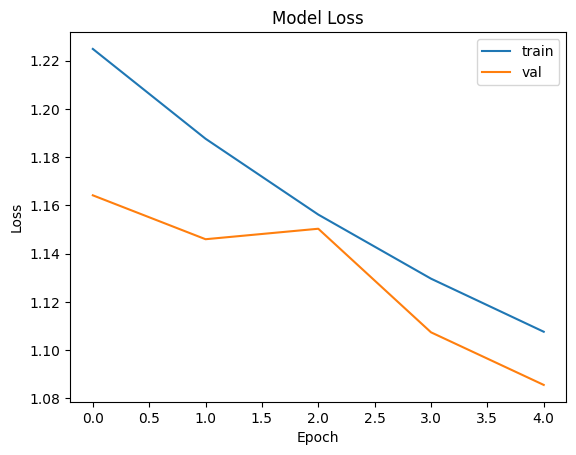

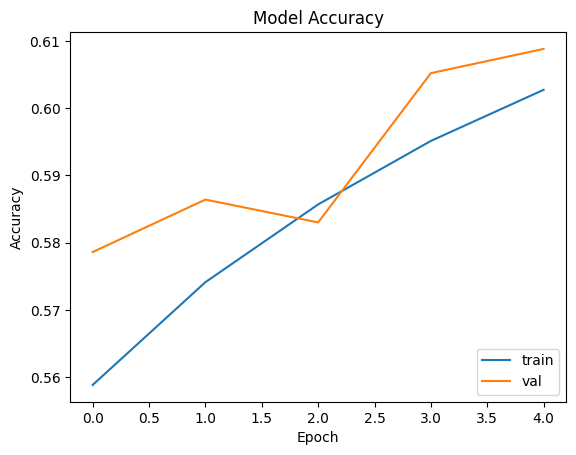

In [ ]:
#3.Visualize Loss and Accuracy using the history object
import matplotlib.pyplot as plt
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()